# Cirq Conversion

In [1]:
import cirq
from cirq.contrib.svg import SVGCircuit

from cirq_qubitization.quantum_graph.composite_bloq import CompositeBloq
from cirq_qubitization.jupyter_tools import show_bloq

## Using Cirq gates from Bloqs

 - `CirqGateAsBloq(gate)` lets you use any Cirq gate in your composite bloqs.
 - `CompositeBloq.from_cirq_circuit(circuit)` lets you turn any Cirq circuit into an equivalent `CompositeBloq`. Each subbloq will be a `CirqGateAsBloq` wrapper.

### `CirqGateAsBloq`

This wrapper uses the Cirq "calling convention" of one thru-register composted of a 1d array of qubits.

In [2]:
from cirq_qubitization.quantum_graph.cirq_conversion import CirqGateAsBloq

cgab = CirqGateAsBloq(cirq.CNOT)
print(cgab)
for reg in cgab.registers:
    print(' ', reg)

CirqGateAsBloq(gate=cirq.CNOT)
  FancyRegister(name='qubits', bitsize=1, wireshape=(2,), side=<Side.THRU: 3>)


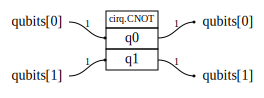

In [3]:
show_bloq(cgab)

### `CompositeBloq.from_cirq_circuit`

A Cirq circuit can be converted to a composite bloq by wrapping each operation with the `CirqGateAsBloq` wrapper. 

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


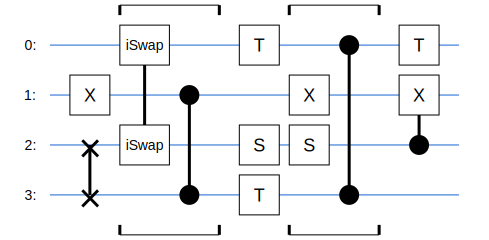

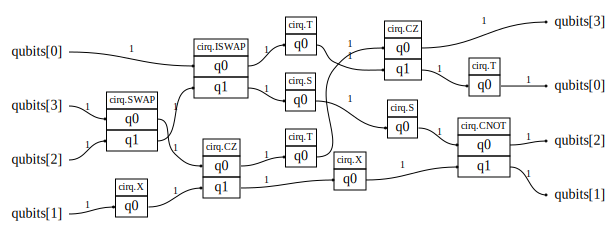

In [4]:
# Make a random cirq circuit
qubits = cirq.LineQubit.range(4)
circuit = cirq.testing.random_circuit(qubits, n_moments=5, op_density=1.0, random_state=52)

# Convert to CompositeBloq
cbloq = CompositeBloq.from_cirq_circuit(circuit)
display(SVGCircuit(circuit))
display(show_bloq(cbloq))

### Unitaries

Both containers support numerical contraction to a dense unitary matrix. Cirq contracts operations into a large identity matrix "in order". Bloqs use `quimb` to find a good contraction ordering and perform the contraction. 

In [5]:
import numpy as np

bloq_unitary = cbloq.tensor_contract()
cirq_unitary = circuit.unitary(qubits)
np.testing.assert_allclose(cirq_unitary, bloq_unitary, atol=1e-8)

### Back to `cirq.Circuit`

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


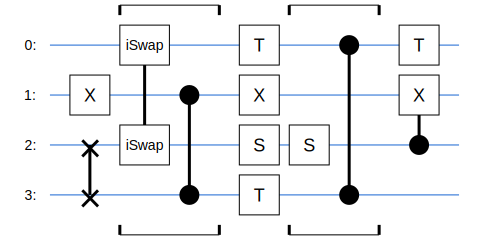

In [7]:
# Note: a 1d `wireshape` bloq register is actually two-dimensional in cirq-world
# because of the implicit `bitsize` dimension (which must be explicit in cirq-world).
# CirqGateAsBloq has registers of bitsize=1 and wireshape=(n,); hence the list transpose below.
circuit2, _ = cbloq.to_cirq_circuit(**{'qubits': [[q] for q in qubits]})
SVGCircuit(circuit2)

In [8]:
# We lose the moment structure during the roundtrip.
circuit == circuit2

False

In [9]:
# But the left-aligned `circuit` is recovered.
cirq.Circuit(circuit.all_operations()) == circuit2

True

## Converting Bloqs to Cirq objects

 - `Bloq.as_cirq_op` is an overridable method to declare what cirq operation corresponds to a bloq.
 - `CompositeBloq.to_cirq_circuit` will export a CompositeBloq to a cirq circuit.
 - `BloqAsCirqGate` provides a shim for using bloqs in cirq circuits automatically.

### `as_cirq_op` 

Bloqs can override `as_cirq_op` to optionally declare their corresponding Cirq operation.

In [10]:
# TODO: show a bloq definition

### `CompositeBloq.to_cirq_circuit`

A composite bloq can be turned into a circuit composed of the result of `as_cirq_op` for each of the subbloqs.

In [11]:
# TODO: show a composite bloq

### `BloqAsCirqGate`

The default behavior of `as_cirq_op` will shim the bloq into this object which lets you use a bloq in cirq circuits.

In [12]:
# TODO: show example

### Allocation and de-allocation

TODO: describe

In [13]:
from cirq_qubitization.bloq_algos.and_bloq import MultiAnd

multi_and = MultiAnd(cvs=(1, 1, 1, 1))

In [14]:
cirq_quregs = multi_and.registers.get_cirq_quregs()
cirq_quregs

{'ctrl': array([[cirq.NamedQubit('ctrl[0, 0]')],
        [cirq.NamedQubit('ctrl[1, 0]')],
        [cirq.NamedQubit('ctrl[2, 0]')],
        [cirq.NamedQubit('ctrl[3, 0]')]], dtype=object)}

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


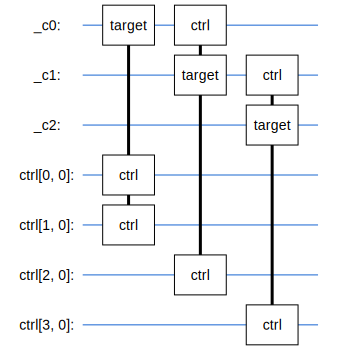

In [16]:
multi_and_circuit, out_quregs = multi_and.decompose_bloq().to_cirq_circuit(**cirq_quregs)
SVGCircuit(multi_and_circuit)

In [17]:
# We are returned the final assignment of registers to qubits
# Note that some qubits were allocated.
out_quregs

{'ctrl': array([[cirq.NamedQubit('ctrl[0, 0]')],
        [cirq.NamedQubit('ctrl[1, 0]')],
        [cirq.NamedQubit('ctrl[2, 0]')],
        [cirq.NamedQubit('ctrl[3, 0]')]], dtype=object),
 'junk': array([[CleanQubit(0)],
        [CleanQubit(1)]], dtype=object),
 'target': array([CleanQubit(2)], dtype=object)}